In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [69]:
df = pd.read_csv('/content/drive/MyDrive/house-prices-advanced-regression-techniques (1)/sample_submission.csv')
print(df)
df_ = pd.read_csv('/content/drive/MyDrive/house-prices-advanced-regression-techniques (1)/test.csv')
print(df)
df = pd.read_csv('/content/drive/MyDrive/house-prices-advanced-regression-techniques (1)/train.csv')
print(df)
df.drop('Id',axis=1, inplace=True)

        Id      SalePrice
0     1461  169277.052498
1     1462  187758.393989
2     1463  183583.683570
3     1464  179317.477511
4     1465  150730.079977
...    ...            ...
1454  2915  167081.220949
1455  2916  164788.778231
1456  2917  219222.423400
1457  2918  184924.279659
1458  2919  187741.866657

[1459 rows x 2 columns]
        Id      SalePrice
0     1461  169277.052498
1     1462  187758.393989
2     1463  183583.683570
3     1464  179317.477511
4     1465  150730.079977
...    ...            ...
1454  2915  167081.220949
1455  2916  164788.778231
1456  2917  219222.423400
1457  2918  184924.279659
1458  2919  187741.866657

[1459 rows x 2 columns]
        Id  MSSubClass MSZoning  ...  SaleType  SaleCondition SalePrice
0        1          60       RL  ...        WD         Normal    208500
1        2          20       RL  ...        WD         Normal    181500
2        3          60       RL  ...        WD         Normal    223500
3        4          70       RL  ...  

In [70]:
df_

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,7,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,546.0,546.0,GasA,Gd,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,5,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,4,5,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,252.0,Unf,0.0,294.0,546.0,GasA,TA,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,6,Typ,0,NaN,CarPort,1970.0,Unf,1.0,286.0,TA,TA,Y,0,24,0,0,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,7,1960,1996,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,1224.0,Unf,0.0,0.0,1224.0,GasA,Ex,Y,SBrkr,1224,0,0,1224,1.0,0.0,1,0,4,1,TA,7,Typ,1,TA,Detchd,1960.0,Unf,2.0,576.0,TA,TA,Y,474,0,0,0,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,SFoyer,5,5,1992,1992,Gable,Comp

In [71]:
missing=df.isnull().sum().sort_values(ascending=False)
#missing=missing.drop(missing[missing==0].index)
missing

PoolQC           1453
MiscFeature      1406
Alley            1369
Fence            1179
FireplaceQu       690
                 ... 
CentralAir          0
SaleCondition       0
Heating             0
TotalBsmtSF         0
MSSubClass          0
Length: 80, dtype: int64

In [72]:
df.dtypes

MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 80, dtype: object

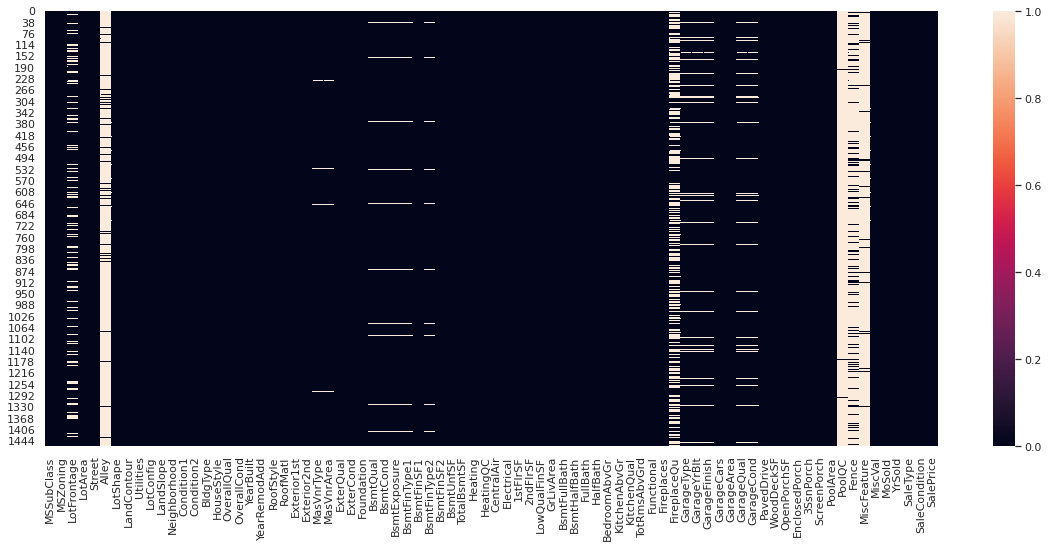

In [73]:
sns.set(rc = {'figure.figsize':(20,8)})
p = sns.heatmap(data=df.isnull())
p

In [74]:
df.head(1)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500


In [75]:
print(df['PoolQC'].dtypes)
print(df['MiscFeature'].dtypes)
print(df['Alley'].dtypes)
print(df['Fence'].dtypes)
print(df['FireplaceQu'].dtypes)
print(df['MSZoning'].dtypes)

object
object
object
object
object
object


In [76]:
df['PoolQC']      =df['PoolQC'].fillna('no')
df['MiscFeature'] =df['MiscFeature'].fillna('no')
df['Alley']       =df['Alley'].fillna('no')
df['Fence']       =df['Fence'].fillna('no')
df['FireplaceQu'] =df['FireplaceQu'].fillna('no')
df['MSZoning']  =df['MSZoning'].fillna('no')
df['GarageCond']  =df['GarageCond'].fillna('no')
df['GarageQual']  =df['GarageQual'].fillna('no')
df['GarageFinish']=df['GarageFinish'].fillna('no')
df['BsmtExposure']=df['BsmtExposure'].fillna('no')
df['BsmtCond']    =df['BsmtCond'].fillna('no')
df['BsmtQual']    =df['BsmtQual'].fillna('no')
df['BsmtFinType2']=df['BsmtFinType2'].fillna('no')
df['BsmtFinType1']=df['BsmtFinType1'].fillna('no')
df['Fence']       =df['Fence'].fillna('no')
df['MasVnrType']  =df['MasVnrType'].fillna('no')
df['GarageYrBlt'] =df['GarageYrBlt'].fillna(0)
df['GarageType']  =df['GarageType'].fillna(0)
df['GarageArea']  =df['GarageArea'].fillna(0)
df['GarageCars']  =df['GarageCars'].fillna(0)
df['BsmtFinSF1']  =df['BsmtFinSF1'].fillna(0)
df['BsmtFinSF2']  =df['BsmtFinSF2'].fillna(0)
df['MasVnrArea']  =df['MasVnrArea'].fillna(0)
df['BsmtFullBath']=df['BsmtFullBath'].fillna(0)
df['BsmtHalfBath']=df['BsmtHalfBath'].fillna(0)
df['BsmtUnfSF']   =df['BsmtUnfSF'].fillna(0)
df['TotalBsmtSF'] =df['TotalBsmtSF'].fillna(0)

In [77]:
missing=df.isnull().sum().sort_values(ascending=False)
missing=missing.drop(missing[missing==0].index)
missing

LotFrontage    259
Electrical       1
dtype: int64

In [79]:
df.drop('LotFrontage',axis=1, inplace=True)
df.drop('Electrical',axis=1, inplace=True)

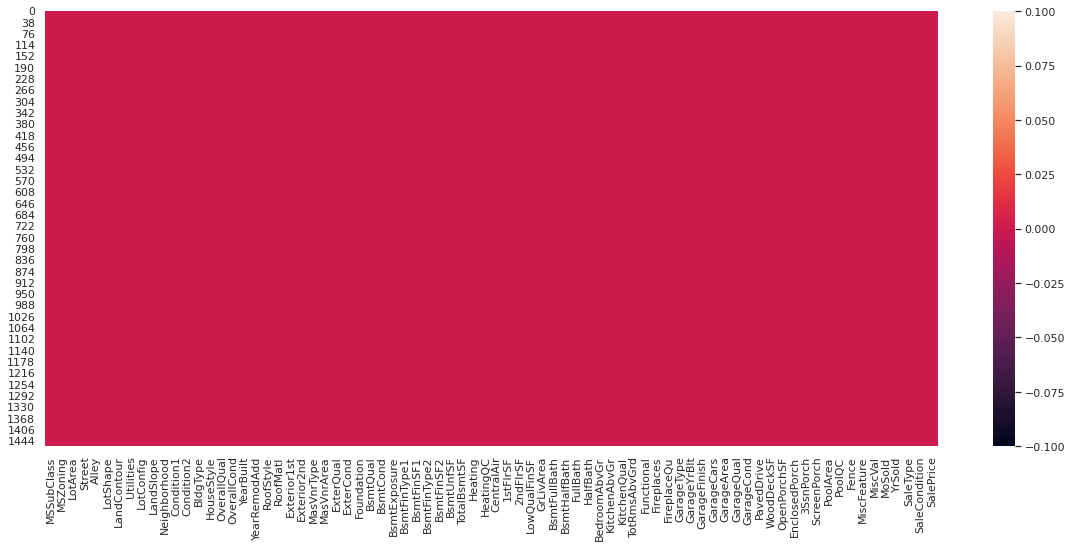

In [80]:
sns.heatmap(data=df.isnull())

In [85]:
float_columns = df[df.columns[df.dtypes=='float']]
float_columns.columns

Index(['MasVnrArea', 'GarageYrBlt'], dtype='object')

In [86]:
obj_columns = df[df.columns[df.dtypes=='object']]
obj_columns.columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'KitchenQual', 'Functional',
       'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType',
       'SaleCondition'],
      dtype='object')

In [142]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['MSZoning']= label_encoder.fit_transform(df['MSZoning'])
df['Street']= label_encoder.fit_transform(df['Street'])
df['Alley']= label_encoder.fit_transform(df['Alley'])
df['LotShape']= label_encoder.fit_transform(df['LotShape'])
df['LandContour']= label_encoder.fit_transform(df['LandContour'])
df['Utilities']= label_encoder.fit_transform(df['Utilities'])
df['LotConfig']= label_encoder.fit_transform(df['LotConfig'])
df['LandSlope']= label_encoder.fit_transform(df['LandSlope'])
df['Neighborhood']= label_encoder.fit_transform(df['Neighborhood'])
df['RoofMatl']= label_encoder.fit_transform(df['RoofMatl'])
df['RoofStyle']= label_encoder.fit_transform(df['RoofStyle'])
df['Exterior1st']= label_encoder.fit_transform(df['Exterior1st'])
df['Exterior2nd']= label_encoder.fit_transform(df['Exterior2nd'])
df['SaleType']= label_encoder.fit_transform(df['SaleType'])
df['Condition1']= label_encoder.fit_transform(df['Condition1'])
df['Condition2']= label_encoder.fit_transform(df['Condition2'])
df['HouseStyle']= label_encoder.fit_transform(df['HouseStyle'])
df['RoofMatl']= label_encoder.fit_transform(df['RoofMatl'])
df['MasVnrType']= label_encoder.fit_transform(df['MasVnrType'])
df['ExterQual']= label_encoder.fit_transform(df['ExterQual'])
df['ExterCond']= label_encoder.fit_transform(df['ExterCond'])
df['Foundation']= label_encoder.fit_transform(df['Foundation'])
df['BsmtQual']= label_encoder.fit_transform(df['BsmtQual'])
df['BsmtCond']= label_encoder.fit_transform(df['BsmtCond'])
df['BsmtExposure']= label_encoder.fit_transform(df['BsmtExposure'])
df['BsmtFinType1']= label_encoder.fit_transform(df['BsmtFinType1'])
df['BsmtFinType2']= label_encoder.fit_transform(df['BsmtFinType2'])
df['Heating']= label_encoder.fit_transform(df['Heating'])
df['HeatingQC']= label_encoder.fit_transform(df['HeatingQC'])
df['CentralAir']= label_encoder.fit_transform(df['CentralAir'])
df['KitchenQual']= label_encoder.fit_transform(df['KitchenQual'])
df['Functional']= label_encoder.fit_transform(df['Functional'])
df['SaleType']= label_encoder.fit_transform(df['SaleType'])
df['FireplaceQu']= label_encoder.fit_transform(df['FireplaceQu'])
df['GarageQual']= label_encoder.fit_transform(df['GarageQual'])
df['GarageFinish']= label_encoder.fit_transform(df['GarageFinish'])
df['GarageCond']= label_encoder.fit_transform(df['GarageCond'])
df['PavedDrive']= label_encoder.fit_transform(df['PavedDrive'])
df['PoolQC']= label_encoder.fit_transform(df['PoolQC'])
df['Fence']= label_encoder.fit_transform(df['Fence'])
df['MiscFeature']= label_encoder.fit_transform(df['MiscFeature'])
df['SaleType']= label_encoder.fit_transform(df['SaleType'])
df['SaleCondition']= label_encoder.fit_transform(df['SaleCondition'])

In [168]:

df = df.drop(['PoolQC', 'GarageQual'], axis=1)

In [169]:
df.head()

,MSSubClass,MSZoning,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,3,8450,1,2,3,3,0,4,0,5,2,2,0,5,7,5,2003,2003,1,1,12,13,1,196.0,2,4,2,2,3,3,2,706,5,0,150,856,1,0,1,856,854,0,1710,1,0,2,1,3,1,2,8,6,0,5,2003.0,1,2,548,4,2,0,61,0,0,0,0,4,4,0,2,2008,8,4,208500
1,20,3,9600,1,2,3,3,0,2,0,24,1,2,0,2,6,8,1976,1976,1,1,8,8,2,0.0,3,4,1,2,3,1,0,978,5,0,284,1262,1,0,1,1262,0,0,1262,0,1,2,0,3,1,3,6,6,1,4,1976.0,1,2,460,4,2,298,0,0,0,0,0,4,4,0,5,2007,8,4,181500
2,60,3,11250,1,2,0,3,0,4,0,5,2,2,0,5,7,5,2001,2002,1,1,12,13,1,162.0,2,4,2,2,3,2,2,486,5,0,434,920,1,0,1,920,866,0,1786,1,0,2,1,3,1,2,6,6,1,4,2001.0,1,2,608,4,2,0,42,0,0,0,0,4,4,0,9,2008,8,4,223500
3,70,3,9550,1,2,0,3,0,0,0,6,2,2,0,5,7,5,1915,1970,1,1,13,15,2,0.0,3,4,0,3,1,3,0,216,5,0,540,756,1,2,1,961,756,0,1717,1,0,1,0,3,1,2,7,6,1,2,1998.0,2,3,642,4,2,0,35,272,0,0,0,4,4,0,2,2006,8,0,140000
4,60,3,14260,1,2,0,3,0,2,0,15,2,2,0,5,8,5,2000,2000,1,1,12,13,1,350.0,2,4,2,2,3,0,2,655,5,0,490,1145,1,0,1,1145,1053,0,2198,1,0,2,1,4,1,2,9,6,1,4,2000.0,1,3,836,4,2,192,84,0,0,0,0,4,4,0,12,2008,8,4,250000


In [ ]:
df = df.drop('GarageType', axis =1)

In [171]:
y= df['SalePrice']

In [172]:
X = df.drop('SalePrice', axis =1)

In [173]:
from sklearn.linear_model import LinearRegression,LogisticRegression, SGDRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.metrics import classification_report, confusion_matrix, mean_absolute_error, roc_curve, roc_auc_score, r2_score, mean_squared_error
from sklearn import metrics
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

In [174]:
models = {
    "Linear Regression": LinearRegression(fit_intercept=True),
    "KNN": KNeighborsRegressor(),
    "XGbr":XGBRegressor(),
    "SGD": SGDRegressor(),
    "Decisiontree": DecisionTreeRegressor(),
    "RandomForest": RandomForestRegressor(max_features='sqrt', random_state=5),
    "LogisticRegression": LogisticRegression()
}

for model in models.items():
    m = model[1]
    m.fit(X_train, y_train)
    pred1 = m.predict(X_test)
    print(model[0])
    print("Score: ", m.score(X_test,y_test))
    mae1 = mean_absolute_error(y_test, pred1)
    mse1 = mean_squared_error(y_test, pred1)
    print('MAE: {:.2f} \nMSE: {:.2f}'.format( mae1, mse1))
    print("")

Linear Regression
Score:  0.8377773498637007
MAE: 22039.86 
MSE: 950368684.10

KNN
Score:  0.6756917176576325
MAE: 29169.98 
MSE: 1899934659.38

[11:20:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
XGbr
Score:  0.891379468212903
MAE: 16973.59 
MSE: 636344874.00

SGD
Score:  -2.536408650693982e+24
MAE: 93896506039217088.00 
MSE: 14859351327716629997600710630309888.00

Decisiontree
Score:  0.7255307076318434
MAE: 25070.83 
MSE: 1607956841.99

RandomForest
Score:  0.8780004535222903
MAE: 16958.14 
MSE: 714724783.18

LogisticRegression
Score:  0.00684931506849315
MAE: 39797.40 
MSE: 3868460208.00



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [102]:
df_.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [156]:
df_ =df_.drop('Id',axis=1, inplace=True)

KeyError: ignored

In [106]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df_['MSZoning']= label_encoder.fit_transform(df_['MSZoning'])
df_['Street']= label_encoder.fit_transform(df_['Street'])
df_['Alley']= label_encoder.fit_transform(df_['Alley'])
df_['LotShape']= label_encoder.fit_transform(df_['LotShape'])
df_['LandContour']= label_encoder.fit_transform(df_['LandContour'])
df_['Utilities']= label_encoder.fit_transform(df_['Utilities'])
df_['LotConfig']= label_encoder.fit_transform(df_['LotConfig'])
df_['LandSlope']= label_encoder.fit_transform(df_['LandSlope'])
df_['Neighborhood']= label_encoder.fit_transform(df_['Neighborhood'])
df_['RoofMatl']= label_encoder.fit_transform(df_['RoofMatl'])
df_['RoofStyle']= label_encoder.fit_transform(df_['RoofStyle'])
df_['Exterior1st']= label_encoder.fit_transform(df_['Exterior1st'])
df_['Exterior2nd']= label_encoder.fit_transform(df_['Exterior2nd'])
df_['SaleType']= label_encoder.fit_transform(df_['SaleType'])
df_['Condition1']= label_encoder.fit_transform(df_['Condition1'])
df_['Condition2']= label_encoder.fit_transform(df_['Condition2'])
df_['HouseStyle']= label_encoder.fit_transform(df_['HouseStyle'])
df_['RoofMatl']= label_encoder.fit_transform(df_['RoofMatl'])
df_['MasVnrType']= label_encoder.fit_transform(df_['MasVnrType'])
df_['ExterQual']= label_encoder.fit_transform(df_['ExterQual'])
df_['ExterCond']= label_encoder.fit_transform(df_['ExterCond'])
df_['Foundation']= label_encoder.fit_transform(df_['Foundation'])
df_['BsmtQual']= label_encoder.fit_transform(df_['BsmtQual'])
df_['BsmtCond']= label_encoder.fit_transform(df_['BsmtCond'])
df_['BsmtExposure']= label_encoder.fit_transform(df_['BsmtExposure'])
df_['BsmtFinType1']= label_encoder.fit_transform(df_['BsmtFinType1'])
df_['BsmtFinType2']= label_encoder.fit_transform(df_['BsmtFinType2'])
df_['Heating']= label_encoder.fit_transform(df_['Heating'])
df_['HeatingQC']= label_encoder.fit_transform(df_['HeatingQC'])
df_['CentralAir']= label_encoder.fit_transform(df_['CentralAir'])
df_['KitchenQual']= label_encoder.fit_transform(df_['KitchenQual'])
df_['Functional']= label_encoder.fit_transform(df_['Functional'])
df_['SaleType']= label_encoder.fit_transform(df_['SaleType'])
df_['FireplaceQu']= label_encoder.fit_transform(df_['FireplaceQu'])
df_['GarageType']= label_encoder.fit_transform(df_['GarageType'])
df_['GarageFinish']= label_encoder.fit_transform(df_['GarageFinish'])
df_['GarageCond']= label_encoder.fit_transform(df_['GarageCond'])
df_['PavedDrive']= label_encoder.fit_transform(df_['PavedDrive'])
df_['Fence']= label_encoder.fit_transform(df_['Fence'])
df_['MiscFeature']= label_encoder.fit_transform(df_['MiscFeature'])
df_['SaleType']= label_encoder.fit_transform(df_['SaleType'])
df_['SaleCondition']= label_encoder.fit_transform(df_['SaleCondition'])

In [108]:
df_.replace([np.inf, -np.inf], 0, inplace=True)
df_.replace([np.nan],0, inplace=True)

In [157]:
df_['BldgType']= label_encoder.fit_transform(df_['BldgType'])
df_['Electrical']= label_encoder.fit_transform(df_['Electrical'])

#df_.drop('GarageQual',axis=1, inplace=True)
df_ = df_.drop('PoolQC',axis=1, inplace=True)

KeyError: ignored

In [130]:
df_.dtypes

MSSubClass         int64
MSZoning           int64
LotFrontage      float64
LotArea            int64
Street             int64
                  ...   
MiscVal            int64
MoSold             int64
YrSold             int64
SaleType           int64
SaleCondition      int64
Length: 77, dtype: object

In [163]:
df.head()

,MSSubClass,MSZoning,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,3,8450,1,2,3,3,0,4,0,5,2,2,0,5,7,5,2003,2003,1,1,12,13,1,196.0,2,4,2,2,3,3,2,706,5,0,150,856,1,0,1,856,854,0,1710,1,0,2,1,3,1,2,8,6,0,5,2003.0,1,2,548,4,4,2,0,61,0,0,0,0,3,4,4,0,2,2008,8,4,208500
1,20,3,9600,1,2,3,3,0,2,0,24,1,2,0,2,6,8,1976,1976,1,1,8,8,2,0.0,3,4,1,2,3,1,0,978,5,0,284,1262,1,0,1,1262,0,0,1262,0,1,2,0,3,1,3,6,6,1,4,1976.0,1,2,460,4,4,2,298,0,0,0,0,0,3,4,4,0,5,2007,8,4,181500
2,60,3,11250,1,2,0,3,0,4,0,5,2,2,0,5,7,5,2001,2002,1,1,12,13,1,162.0,2,4,2,2,3,2,2,486,5,0,434,920,1,0,1,920,866,0,1786,1,0,2,1,3,1,2,6,6,1,4,2001.0,1,2,608,4,4,2,0,42,0,0,0,0,3,4,4,0,9,2008,8,4,223500
3,70,3,9550,1,2,0,3,0,0,0,6,2,2,0,5,7,5,1915,1970,1,1,13,15,2,0.0,3,4,0,3,1,3,0,216,5,0,540,756,1,2,1,961,756,0,1717,1,0,1,0,3,1,2,7,6,1,2,1998.0,2,3,642,4,4,2,0,35,272,0,0,0,3,4,4,0,2,2006,8,0,140000
4,60,3,14260,1,2,0,3,0,2,0,15,2,2,0,5,8,5,2000,2000,1,1,12,13,1,350.0,2,4,2,2,3,0,2,655,5,0,490,1145,1,0,1,1145,1053,0,2198,1,0,2,1,4,1,2,9,6,1,4,2000.0,1,3,836,4,4,2,192,84,0,0,0,0,3,4,4,0,12,2008,8,4,250000


In [159]:
object_columnns = df_[df_.columns]
object_columnns.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'Op

In [160]:
df.describe

<bound method NDFrame.describe of       MSSubClass  MSZoning  LotArea  ...  SaleType  SaleCondition  SalePrice
0             60         3     8450  ...         8              4     208500
1             20         3     9600  ...         8              4     181500
2             60         3    11250  ...         8              4     223500
3             70         3     9550  ...         8              0     140000
4             60         3    14260  ...         8              4     250000
...          ...       ...      ...  ...       ...            ...        ...
1455          60         3     7917  ...         8              4     175000
1456          20         3    13175  ...         8              4     210000
1457          70         3     9042  ...         8              4     266500
1458          20         3     9717  ...         8              4     142125
1459          20         3     9937  ...         8              4     147500

[1460 rows x 77 columns]>

In [167]:
df_.describe

<bound method NDFrame.describe of       MSSubClass  MSZoning  LotArea  ...  YrSold  SaleType  SaleCondition
0             20         2    11622  ...    2010         8              4
1             20         3    14267  ...    2010         8              4
2             60         3    13830  ...    2010         8              4
3             60         3     9978  ...    2010         8              4
4            120         3     5005  ...    2010         8              4
...          ...       ...      ...  ...     ...       ...            ...
1454         160         4     1936  ...    2006         8              4
1455         160         4     1894  ...    2006         8              0
1456          20         3    20000  ...    2006         8              0
1457          85         3    10441  ...    2006         8              4
1458          60         3     9627  ...    2006         8              4

[1459 rows x 74 columns]>

In [165]:
df_ = df_.drop(['Electrical', 'LotFrontage', 'GarageType'], axis=1)

In [175]:
m = XGBRegressor()
m.fit(X_train, y_train)

y_pred = m.predict(df_)

[11:20:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [178]:
y_pred

array([122720.56 , 160153.61 , 185193.98 , ..., 162163.78 , 125169.336,
       232376.42 ], dtype=float32)

In [179]:
pred = pd.DataFrame(y_pred)
sub_df = pd.read_csv('/content/drive/MyDrive/house-prices-advanced-regression-techniques (1)/sample_submission.csv')
dataset = pd.concat([sub_df['Id'],pred], axis=1)
dataset.coloumns = ['Id' , 'Saleprice']
dataset.to_csv('submission.csv', index=False)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  after removing the cwd from sys.path.


In [180]:
result = pd.DataFrame()
result['Id'] = sub_df['Id']
result['SalePrice'] = y_pred
result.head()

,Id,SalePrice
0,1461,122720.562500
1,1462,160153.609375
2,1463,185193.984375
3,1464,185836.250000
4,1465,198686.437500


In [181]:
result.to_csv('submissions.csv', index=False)